# Various working examples of autoencoders

Ref: [Keras blog](https://blog.keras.io/building-autoencoders-in-keras.html)

In [136]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

In [137]:
#the size of the encoded representation
encodingDim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [138]:
# placeholder for the input image
inputImg = Input(shape=(784,))

"encoded" is the encoded representation of the input

In [139]:
encoded = Dense(encodingDim, activation='relu')(inputImg)

In [140]:
decoded = Dense(784, activation='sigmoid')(encoded)

Try another network with the relu activation function in the decoder and check the performance. 

In [141]:
autoencoder = Model(inputImg, decoded)

In [142]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_25 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [143]:
785 * 32

25120

In [144]:
33 * 784

25872

In [145]:
type(autoencoder)

keras.engine.training.Model

Let's also create separate encoder and decoder models. 

In [146]:
encoder = Model(inputImg, encoded)

In [147]:
encodedInput = Input(shape=(encodingDim,))
decoderLayer = autoencoder.layers[-1]
decoder = Model(encodedInput, decoderLayer(encodedInput))

Let's build the same network using the Sequential class of keras. 

In [148]:
autoencoderSeq = Sequential()

In [149]:
autoencoderSeq.add(Dense(encodingDim, input_shape=(784,), activation='relu'))

In [150]:
autoencoderSeq.add(Dense(784, activation='sigmoid'))

In [151]:
autoencoderSeq.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_27 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [152]:
type(autoencoderSeq)

keras.models.Sequential

Now, let's train the network to reconstruct MNIST digits

In [153]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [154]:
autoencoderSeq.compile(optimizer='adadelta', loss='binary_crossentropy')

In [155]:
from keras.datasets import mnist
import numpy as np

In [156]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

In [157]:
Xtrain.shape

(60000, 28, 28)

In [158]:
Xtest.shape

(10000, 28, 28)

In [159]:
ytest.shape

(10000,)

In [160]:
XtrainScaled = Xtrain.astype('float32') / 255.

In [161]:
XtestScaled = Xtest.astype('float32') / 255.

Can think of the above as MaxAbsScaler

In [162]:
import numpy as np

In [163]:
np.prod(XtrainScaled.shape[1:])

784

In [164]:
XtrainScaledFlatten = XtrainScaled.reshape((len(XtrainScaled), np.prod(XtrainScaled.shape[1:])))

In [165]:
XtestScaledFlatten = XtestScaled.reshape((len(XtestScaled), np.prod(XtestScaled.shape[1:])))

In [166]:
XtrainScaledFlatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Training the autoencoder

In [167]:
history = autoencoder.fit(XtrainScaledFlatten, XtrainScaledFlatten, epochs=100, 
                          batch_size=256, shuffle=True, verbose=1, validation_data=(XtestScaledFlatten, XtestScaledFlatten)).history

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3594 - val_loss: 0.2710
Epoch 2/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.2638 - val_loss: 0.2530
Epoch 3/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2428 - val_loss: 0.2307
Epoch 4/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2226 - val_loss: 0.2124
Epoch 5/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.2071 - val_loss: 0.1997
Epoch 6/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1961 - val_loss: 0.1901
Epoch 7/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1877 - val_loss: 0.1826
Epoch 8/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1808 - val_loss: 0.1762
Epoch 9/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1747 - val_loss: 0.1

60000/60000 [==============================] - 2s 29us/step - loss: 0.1007 - val_loss: 0.0991
Epoch 78/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1006 - val_loss: 0.0990
Epoch 79/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1005 - val_loss: 0.0989
Epoch 80/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1005 - val_loss: 0.0989
Epoch 81/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1004 - val_loss: 0.0988
Epoch 82/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1004 - val_loss: 0.0988
Epoch 83/100
60000/60000 [==============================] - 105s 2ms/step - loss: 0.1003 - val_loss: 0.0987
Epoch 84/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.1002 - val_loss: 0.0987
Epoch 85/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.1002 - val_loss: 0.0986
Epoch 86/100
60000/60000 [=======================

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

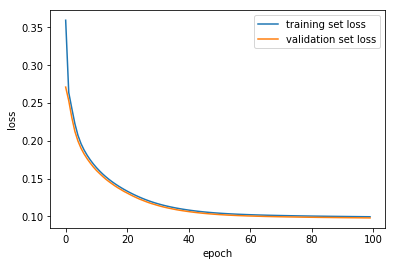

In [171]:
plt.plot(history['loss']);
plt.plot(history['val_loss']);
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set loss', 'validation set loss']);

In [146]:
encoder = Model(inputImg, encoded)

In [147]:
encodedInput = Input(shape=(encodingDim,))
decoderLayer = autoencoder.layers[-1]
decoder = Model(encodedInput, decoderLayer(encodedInput))

In [172]:
encodedImages = encoder.predict(XtestScaledFlatten)

In [173]:
decodedImages = decoder.predict(encodedImages)

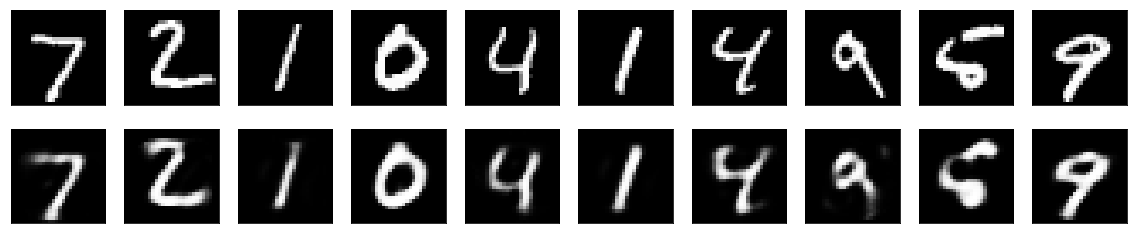

In [174]:
import matplotlib.pyplot as plt

n = 10 #how many number of digits we will display

plt.figure(figsize=(20,4))

for i in range(n):
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(XtestScaledFlatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decodedImages[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Adding sparsity constraint to autoencoders

In [193]:
from keras import regularizers

encodingDim = 32

inputImg = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encodingDim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(inputImg)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(inputImg, decoded)

In [194]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
history = autoencoder.fit(XtrainScaledFlatten, XtrainScaledFlatten, epochs=200, 
                          batch_size=256, shuffle=True, verbose=1, validation_data=(XtestScaledFlatten, XtestScaledFlatten)).history

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.6731 - val_loss: 0.6485
Epoch 2/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/200
60000/60000 [==============================] - 2s 34us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/200
60000/60000 [==============================] - 2s 37us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/200
60000/60000 [==============================] - 2s 36us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.4531 - val_loss: 0.4

60000/60000 [==============================] - 2s 39us/step - loss: 0.2828 - val_loss: 0.2826
Epoch 78/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.2825 - val_loss: 0.2823
Epoch 79/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.2822 - val_loss: 0.2820
Epoch 80/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.2819 - val_loss: 0.2817
Epoch 81/200
60000/60000 [==============================] - 3s 42us/step - loss: 0.2816 - val_loss: 0.2814
Epoch 82/200
60000/60000 [==============================] - 3s 42us/step - loss: 0.2813 - val_loss: 0.2812
Epoch 83/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.2810 - val_loss: 0.2809
Epoch 84/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.2808 - val_loss: 0.2806
Epoch 85/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.2805 - val_loss: 0.2804
Epoch 86/200
60000/60000 [========================

60000/60000 [==============================] - 3s 51us/step - loss: 0.2715 - val_loss: 0.2713
Epoch 154/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.2714 - val_loss: 0.2713
Epoch 155/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.2714 - val_loss: 0.2712
Epoch 156/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.2713 - val_loss: 0.2711
Epoch 157/200
60000/60000 [==============================] - 2s 41us/step - loss: 0.2712 - val_loss: 0.2711
Epoch 158/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.2712 - val_loss: 0.2710
Epoch 159/200
60000/60000 [==============================] - 2s 38us/step - loss: 0.2711 - val_loss: 0.2709
Epoch 160/200
60000/60000 [==============================] - 3s 47us/step - loss: 0.2711 - val_loss: 0.2709
Epoch 161/200
60000/60000 [==============================] - 2s 41us/step - loss: 0.2710 - val_loss: 0.2708
Epoch 162/200
60000/60000 [===============

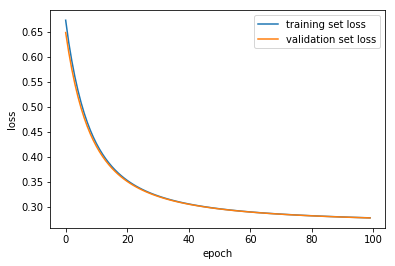

In [188]:
plt.plot(history['loss']);
plt.plot(history['val_loss']);
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set loss', 'validation set loss']);

In [192]:
encoder = Model(input_img, encoded)

In [180]:
encodedInput = Input(shape=(encodingDim,))
decoderLayer = autoencoder2.layers[-1]
decoder = Model(encodedInput, decoderLayer(encodedInput))

In [181]:
encodedImages = encoder.predict(XtestScaledFlatten)

In [182]:
decodedImages = decoder.predict(encodedImages)

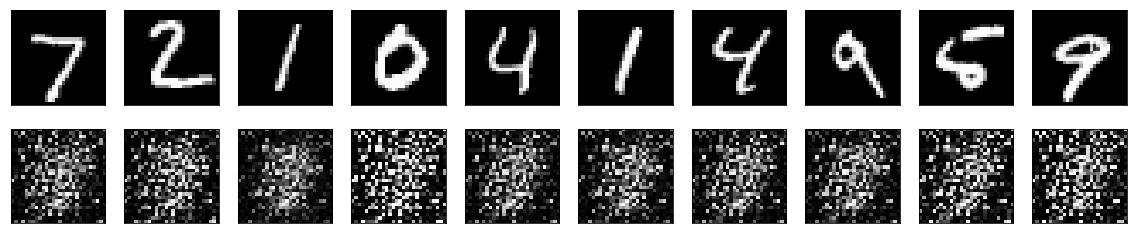

In [189]:
n = 10 #how many number of digits we will display

plt.figure(figsize=(20,4))

for i in range(n):
    
    ax = plt.subplot(2, n, i+1)
    plt.imshow(XtestScaledFlatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decodedImages[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()